<a href="https://colab.research.google.com/github/PravinVedurla/Natural-Images-Multiclass-Classification-using-Keras-Tensorflow/blob/master/Multi_class_classification_of_Natural_Images_with_Keras_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pravinved","key":"0d5f2987f9e9d75297912c03636a0ae5"}'}

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as im

import os
import glob
import numpy as np


In [3]:
os.listdir()

['.config', 'kaggle.json', 'sample_data']

In [0]:
#Installing kaggle dependency.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d prasunroy/natural-images

 98% 167M/171M [00:02<00:00, 57.2MB/s]
100% 171M/171M [00:02<00:00, 61.2MB/s]


In [7]:
!unzip natural-images.zip

Archive:  natural-images.zip
   creating: natural_images/
   creating: natural_images/airplane/
  inflating: natural_images/airplane/airplane_0000.jpg  
  inflating: natural_images/airplane/airplane_0001.jpg  
  inflating: natural_images/airplane/airplane_0002.jpg  
  inflating: natural_images/airplane/airplane_0003.jpg  
  inflating: natural_images/airplane/airplane_0004.jpg  
  inflating: natural_images/airplane/airplane_0005.jpg  
  inflating: natural_images/airplane/airplane_0006.jpg  
  inflating: natural_images/airplane/airplane_0007.jpg  
  inflating: natural_images/airplane/airplane_0008.jpg  
  inflating: natural_images/airplane/airplane_0009.jpg  
  inflating: natural_images/airplane/airplane_0010.jpg  
  inflating: natural_images/airplane/airplane_0011.jpg  
  inflating: natural_images/airplane/airplane_0012.jpg  
  inflating: natural_images/airplane/airplane_0013.jpg  
  inflating: natural_images/airplane/airplane_0014.jpg  
  inflating: natural_images/airplane/airplane_001

In [8]:
base_dir = '/content/natural_images'

for dirpath, dirnames,_ in os.walk('/content/natural_images'):
  print("path:" + str(dirpath))
  print("Dirname:", str(dirnames))
  


path:/content/natural_images
Dirname: ['person', 'cat', 'dog', 'car', 'fruit', 'flower', 'airplane', 'motorbike']
path:/content/natural_images/person
Dirname: []
path:/content/natural_images/cat
Dirname: []
path:/content/natural_images/dog
Dirname: []
path:/content/natural_images/car
Dirname: []
path:/content/natural_images/fruit
Dirname: []
path:/content/natural_images/flower
Dirname: []
path:/content/natural_images/airplane
Dirname: []
path:/content/natural_images/motorbike
Dirname: []


# Augmenting Data

In [9]:
!pip install Augmentor

In [0]:
import Augmentor
import shutil

In [0]:
def augment(dirs):
  for i in dirs:
    sour_path = os.path.join(base_dir, i) #defining path to the classes individually
    p = Augmentor.Pipeline(sour_path, save_format='PNG')

    p.rotate180(probability=0.5)
    p.skew(probability=0.5, magnitude=0.3)
    p.random_distortion(probability=0.2, magnitude=3, grid_height=16, grid_width=16)
    p.crop_random(probability=0.3, percentage_area=0.8)

    p.sample(2000 - len(os.listdir(sour_path)))

    dest_path = sour_path + "/output"
    files = os.listdir(dest_path)

    for f in files:
      src = os.path.join(dest_path, f)
      dst = os.path.join(sour_path, f)
      shutil.move(src,dst)


In [0]:

# print(2000 - len(os.listdir(os.path.join(base_dir, dirnames[1]))))

In [13]:
dirnames =  ['dog', 'cat', 'person', 'car', 'motorbike', 'flower', 'fruit', 'airplane']
augment(dirnames)
for i in dirnames:
  j = os.path.join(base_dir, str(i))
  print("Number of examples in " + str(i) + ':' + str(len(os.listdir(j))))

Executing Pipeline:   0%|          | 0/1297 [00:00<?, ? Samples/s]

Initialised with 702 image(s) found.
Output directory set to /content/natural_images/dog/output.

Processing <PIL.Image.Image image mode=RGB size=364x271 at 0x7FE8C0E10390>: 100%|██████████| 1297/1297 [00:47<00:00, 27.42 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=111x114 at 0x7FE8C0E35A58>:   0%|          | 1/1114 [00:00<03:27,  5.35 Samples/s]

Initialised with 885 image(s) found.
Output directory set to /content/natural_images/cat/output.

Processing <PIL.Image.Image image mode=RGB size=181x171 at 0x7FE8C0E0A160>: 100%|██████████| 1114/1114 [00:42<00:00, 26.09 Samples/s]
Executing Pipeline:   0%|          | 0/1013 [00:00<?, ? Samples/s]

Initialised with 986 image(s) found.
Output directory set to /content/natural_images/person/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7FE8C102A780>: 100%|██████████| 1013/1013 [00:29<00:00, 34.40 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=80x80 at 0x7FE8C0E023C8>:   1%|          | 7/1031 [00:00<00:36, 28.11 Samples/s]

Initialised with 968 image(s) found.
Output directory set to /content/natural_images/car/output.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x7FE8C0FBB240>: 100%|██████████| 1031/1031 [00:08<00:00, 125.26 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=184x90 at 0x7FE8C102A5C0>:   0%|          | 0/1211 [00:00<?, ? Samples/s]

Initialised with 788 image(s) found.
Output directory set to /content/natural_images/motorbike/output.

Processing <PIL.Image.Image image mode=RGB size=155x72 at 0x7FE8C693E2B0>: 100%|██████████| 1211/1211 [00:12<00:00, 95.34 Samples/s] 
Executing Pipeline:   0%|          | 0/1156 [00:00<?, ? Samples/s]

Initialised with 843 image(s) found.
Output directory set to /content/natural_images/flower/output.

Processing <PIL.Image.Image image mode=RGB size=699x607 at 0x7FE8C0E23BA8>: 100%|██████████| 1156/1156 [01:00<00:00, 19.18 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x7FE8C0DE9470>:   0%|          | 2/999 [00:00<02:30,  6.61 Samples/s]

Initialised with 1000 image(s) found.
Output directory set to /content/natural_images/fruit/output.

Processing <PIL.Image.Image image mode=RGB size=80x80 at 0x7FE8C0F80048>: 100%|██████████| 999/999 [00:08<00:00, 121.89 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=301x82 at 0x7FE8C0E23A90>:   0%|          | 1/1272 [00:00<03:43,  5.68 Samples/s]

Initialised with 727 image(s) found.
Output directory set to /content/natural_images/airplane/output.

Processing <PIL.Image.Image image mode=RGB size=304x95 at 0x7FE8C0F9C9E8>: 100%|██████████| 1272/1272 [00:16<00:00, 76.18 Samples/s] 


Number of examples in dog:2000
Number of examples in cat:2000
Number of examples in person:2000
Number of examples in car:2000
Number of examples in motorbike:2000
Number of examples in flower:2000
Number of examples in fruit:2000
Number of examples in airplane:2000


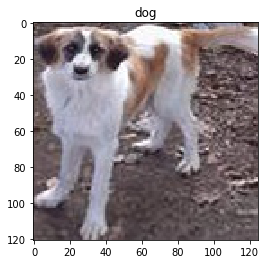

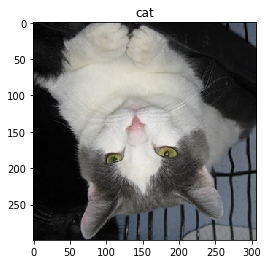

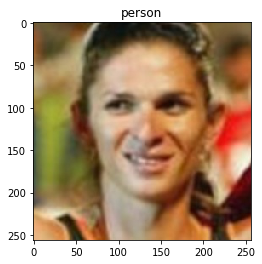

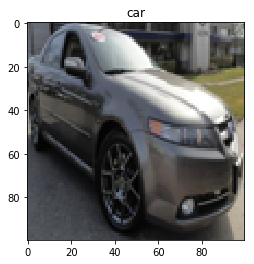

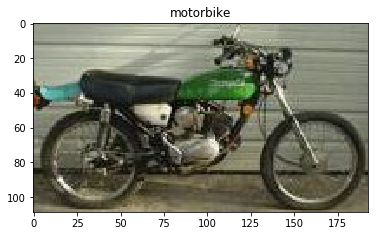

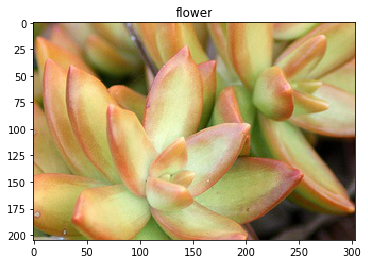

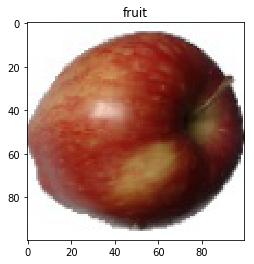

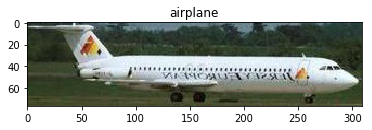

In [14]:
dirnames =  ['dog', 'cat', 'person', 'car', 'motorbike', 'flower', 'fruit', 'airplane']

for i in dirnames:
  path = os.path.join(base_dir, i)
  file1 = os.path.join(path, os.listdir(path)[10])
  img = im.imread(file1)

  plt.figure()
  plt.imshow(img)
  plt.title(str(i))

In [15]:
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.models import Model
from keras import backend as K
from keras.optimizers import SGD
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import (ImageDataGenerator, Iterator,
                                       array_to_img, img_to_array, load_img)
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping

import keras.applications
from keras import layers

Using TensorFlow backend.


In [16]:
img_size = 100
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

# model.fit_generator(
#     train_generator,
#     steps_per_epoch = train_generator.samples // batch_size,
#     validation_data = validation_generator, 
#     validation_steps = validation_generator.samples // batch_size,
#     epochs = nb_epochs)

Found 12800 images belonging to 8 classes.
Found 3192 images belonging to 8 classes.


In [17]:
base_model = keras.applications.VGG16(input_shape=(img_size, img_size, 3),
                                            include_top=False,
                                            weights='imagenet')





58892288/58889256 [==============================] - 3s 0us/step




In [18]:
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [19]:
# Freeze the layers except the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in base_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fe88c2a6cc0> False
<keras.layers.convolutional.Conv2D object at 0x7fe8c69d5b38> False
<keras.layers.convolutional.Conv2D object at 0x7fe8c5880a58> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe88c110ba8> False
<keras.layers.convolutional.Conv2D object at 0x7fe88c1109b0> False
<keras.layers.convolutional.Conv2D object at 0x7fe88aebf7f0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe88aed5b70> False
<keras.layers.convolutional.Conv2D object at 0x7fe88aed51d0> False
<keras.layers.convolutional.Conv2D object at 0x7fe88ae7e6a0> False
<keras.layers.convolutional.Conv2D object at 0x7fe88ae979b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe88ae295c0> False
<keras.layers.convolutional.Conv2D object at 0x7fe88ae294a8> False
<keras.layers.convolutional.Conv2D object at 0x7fe88addbb38> False
<keras.layers.convolutional.Conv2D object at 0x7fe88adf0da0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe88ae06a90>

In [20]:
model = keras.models.Sequential()

# Add the vgg convolutional base model
model.add(base_model)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(8, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# model = keras.Sequential([
#   base_model,
#   keras.layers.GlobalAveragePooling2D(),
#   keras.layers.Dense(8, activation='softmax')
# ])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4719616   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 8200      
Total params: 19,442,504
Trainable params: 4,727,816
Non-trainable params: 14,714,688
__________________________________

In [23]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
epochs = 5
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
400/400 [==============================] - 90s 225ms/step - loss: 0.9016 - acc: 0.8060 - val_loss: 0.2430 - val_acc: 0.9182
Epoch 2/5
400/400 [==============================] - 89s 222ms/step - loss: 0.3546 - acc: 0.8828 - val_loss: 0.1470 - val_acc: 0.9443
Epoch 3/5
400/400 [==============================] - 85s 213ms/step - loss: 0.3132 - acc: 0.8975 - val_loss: 0.1774 - val_acc: 0.9421
Epoch 4/5
400/400 [==============================] - 86s 215ms/step - loss: 0.2896 - acc: 0.9038 - val_loss: 0.1585 - val_acc: 0.9503
Epoch 5/5
400/400 [==============================] - 87s 218ms/step - loss: 0.2758 - acc: 0.9144 - val_loss: 0.1507 - val_acc: 0.9481


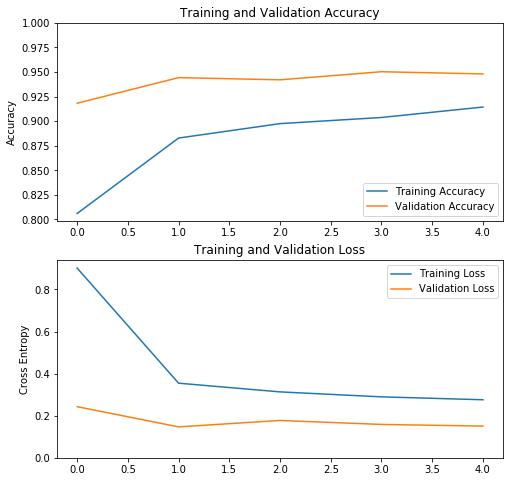

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [0]:
import statistics
a = statistics.mean(val_acc)

In [0]:
model.save("NaturalImagesMulticlassKeras{}.h5".format(a))